<a href="https://colab.research.google.com/github/Zenith1618/LLM/blob/main/Picking_Appropriate_caption_for_Image_using_OpenAI_Clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenAI Clip
CLIP can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized, similar to the “zero-shot” capabilities of GPT-2 and GPT-3.

CLIP is a multi-modal vision and language model. It can be used for image-text similarity and for zero-shot image classification. CLIP uses a ViT like transformer to get visual features and a causal language model to get the text features. Both the text and visual features are then projected to a latent space with identical dimension. The dot product between the projected image and text features is then used as a similar score.

In [7]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel

In [8]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [10]:
clip_model = clip_model.to(device)

In [11]:
image = Image.open("dog.png")

This model has the capability to choose the appropriate caption from a list

In [12]:
prob_captions = ["a cat swimming", "a dog swimming",'a dog and cat fighting']
inputs = processor(text=prob_captions, images=image, return_tensors="pt", padding=True)

In [13]:
inputs = inputs.to(device)

In [14]:
outputs = clip_model(**inputs)

In [15]:
# this is the image-text similarity score
similarity_ids = outputs.logits_per_image

In [16]:
probs_score = similarity_ids.softmax(dim=1)

In [17]:
probs_score

tensor([[2.8687e-03, 9.9711e-01, 2.4373e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [18]:
caption = prob_captions[torch.argmax(probs_score)]

(-0.5, 491.5, 244.5, -0.5)

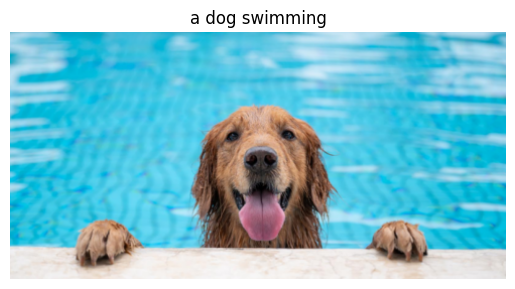

In [19]:
plt.imshow(image)
plt.title(caption)
plt.axis("off")

The model is able to predict the caption correctly